# Linear and Quadratic Discriminant Analysis (iris dataset)

`Linear Discriminant Analysis` `Quadratic Discriminant Analysis`  
`iris dataset`

---

In this notebook, we experiment with linear and quadratic discriminant analysis to classify the data in the iris dataset. We also plot the corresponding decision boundaries.

## Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Data

In [3]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv('data/iris.csv', names=col_names)
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Let's check the properties of the features in the dataset:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Let's encode the target variable numerically:

In [5]:
data["encoded_species"] = data["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Now, let's explore the discriminantion power of the features:

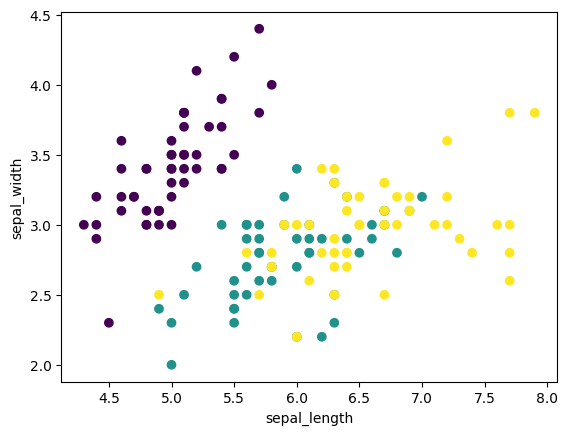

In [6]:
plt.scatter("sepal_length", "sepal_width", c="encoded_species", data=data)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

- It seems that the feature sepal (length,width) is not good at separating the three classes.

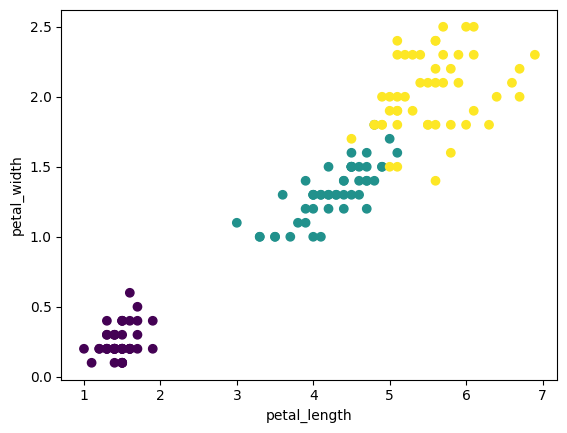

In [7]:
plt.scatter("petal_length", "petal_width", c="encoded_species", data=data)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

- It seems that the feature petal (length,width) is good at separating the three classes.

## Linear discriminant analysis

- Let's start with linear discriminant analysis to spearate the three classes from each other:

In [8]:
lda = LinearDiscriminantAnalysis()

X = data[["petal_length", "petal_width"]].values
y = data["encoded_species"].values

lda.fit(X, y)
lda.coef_, lda.intercept_

(array([[ -9.34569972, -13.26053051],
        [  2.62079274,   0.37706628],
        [  6.72490698,  12.88346423]]),
 array([ 32.87138759, -12.08222731, -53.17773476]))

- The equation of the decision boundary that separate the first class from the other is:


```
y1 = coef[0][0] * x1 + coef[0][1] * x2 + intercept[0], where:
x1 and x2: the features fed to the model (2 in our case)
coef: the linear components learned by the model
intercept: the constant component learned by the model
```



### Plot the decision boundary

- To plot the decision boundary that separate the first class from the rest, we need a function that returns the value of x2 given x1, which could be calculated by setting the formula of the decision boundary to zero, resulting in:


```
x2 = -c1/c2 * x1 - c0/c2 = -(c0 + c1 * x1) / c2
```



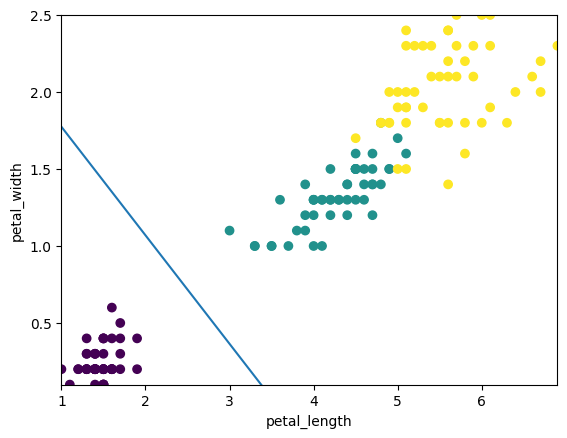

In [12]:
def value_x2(x):
  return -(lda.coef_[0][0] * x + lda.intercept_[0]) / lda.coef_[0][1]

# these are the limits of the plot
x1_min = data["petal_length"].min()
x1_max = data["petal_length"].max()
x2_min = data["petal_width"].min()
x2_max = data["petal_width"].max()

x_range = np.linspace(x1_min, x1_max, 100)
y_range = value_x2(x_range)

# plot the decision boundary
plt.scatter("petal_length", "petal_width", data=data, c="encoded_species")
plt.plot(x_range, y_range)

# correct the limits of the graph
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.xlabel("petal_length")
plt.ylabel("petal_width")

plt.show()

- Now, to plot the decision boundaries between the three classes, we need to get model predictions for a mesh grid of all possible values of the features:

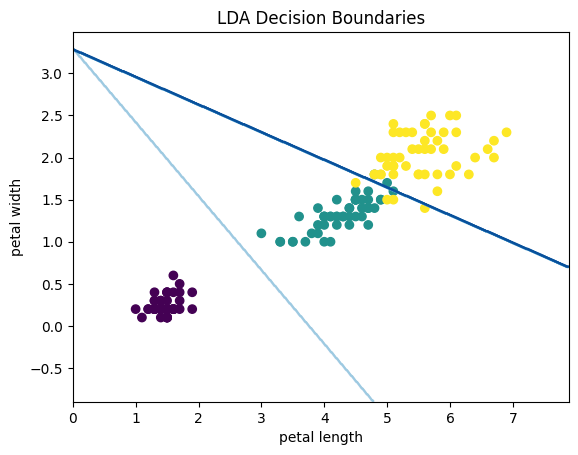

In [17]:
# Create a mesh to plot the decision boundaries
x1_min, x1_max = data["petal_length"].min() - 1, data["petal_length"].max() + 1
x2_min, x2_max = data["petal_width"].min() - 1, data["petal_width"].max() + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), \
                               np.arange(x2_min, x2_max, 0.01))

# Predict class using the classifier for each point in the mesh
preds = lda.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
preds = preds.reshape(x1_grid.shape)

# Plot the decision boundaries
plt.contour(x1_grid, x2_grid, preds.astype(float), cmap=plt.cm.Blues)
plt.scatter(data["petal_length"], data["petal_width"], c=data["encoded_species"])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('LDA Decision Boundaries')
plt.show()

# Quadratic Discriminant Analysis

- Let's now turn into quadratic discriminant analysis to spearate the three classes from each other:

In [19]:
qda = QuadraticDiscriminantAnalysis()

X = data[["petal_length", "petal_width"]].values
y = data["encoded_species"].values

qda.fit(X, y)
qda.means_

array([[1.464, 0.244],
       [4.26 , 1.326],
       [5.552, 2.026]])

### Plot the decision boundary

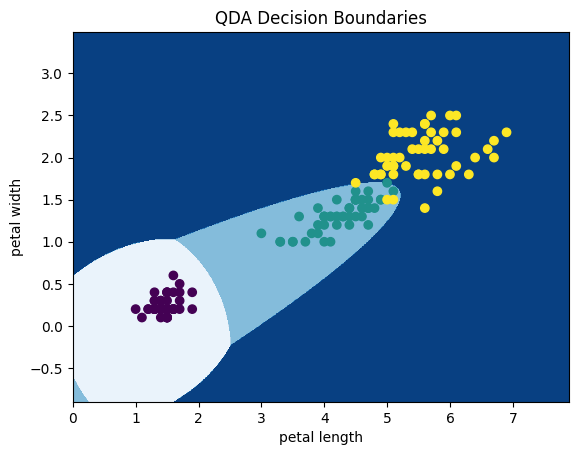

In [20]:
# Create a mesh to plot the decision boundaries
x1_min, x1_max = data["petal_length"].min() - 1, data["petal_length"].max() + 1
x2_min, x2_max = data["petal_width"].min() - 1, data["petal_width"].max() + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), \
                               np.arange(x2_min, x2_max, 0.01))

# Predict class using the classifier for each point in the mesh
preds = qda.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
preds = preds.reshape(x1_grid.shape)

# Plot the decision boundaries
plt.contourf(x1_grid, x2_grid, preds.astype(float), cmap=plt.cm.Blues)
plt.scatter(data["petal_length"], data["petal_width"], c=data["encoded_species"])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('QDA Decision Boundaries')
plt.show()